In [8]:
conda install -c conda-forge wordcloud

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.7.0            |   py37h9bfed18_1         173 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         173 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/osx-64::wordcloud-1.7.0-py37h9bfed18_1



wordcloud-1.7.0      | 173 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1]:
# read in the wine.csv and do a short EDA.  then talk about imputation and do a couple of word clouds

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud

df= pd.read_csv('wine.csv', encoding='unicode_escape')
df.head()

,ï»¿,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selecciââ¥n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodrââ guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La BâÂ©gude, named...",La BrâÂªlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BâÂ©gude


In [2]:
df.describe()

,ï»¿,points,price
count,1103.000000,1103.000000,1046.000000
mean,551.000000,89.701723,40.242830
std,318.552978,2.390405,32.588141
min,0.000000,85.000000,7.000000
25%,275.500000,88.000000,20.000000
50%,551.000000,90.000000,31.000000
75%,826.500000,91.000000,50.000000
max,1102.000000,96.000000,500.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ï»¿          1103 non-null   int64  
 1   country      1103 non-null   object 
 2   description  1103 non-null   object 
 3   designation  834 non-null    object 
 4   points       1103 non-null   int64  
 5   price        1046 non-null   float64
 6   province     1103 non-null   object 
 7   region_1     930 non-null    object 
 8   region_2     492 non-null    object 
 9   variety      1103 non-null   object 
 10  winery       1103 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 94.9+ KB


In [4]:
# what countries is this wine coming from?

countries = df['country'].value_counts()
print(countries)

US              504
France          172
Italy           163
Portugal         70
Spain            64
Germany          27
Argentina        25
Chile            21
South Africa     10
Israel            8
Greece            8
Australia         6
Canada            5
Bulgaria          5
Austria           4
New Zealand       2
Romania           2
Croatia           2
Hungary           2
Slovenia          1
Morocco           1
Moldova           1
Name: country, dtype: int64


In [31]:
# what varieties are people making?

variety = df['variety'].value_counts()
print(variety)

Pinot Noir            128
Chardonnay            103
Cabernet Sauvignon     89
Red Blend              70
Nebbiolo               54
                     ... 
St. Laurent             1
Petite Verdot           1
Nero d'Avola            1
Aglianico               1
Ugni Blanc              1
Name: variety, Length: 124, dtype: int64


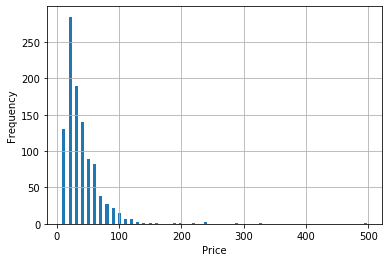

In [32]:
# what do prices look like?

price = df.price
price.plot.hist(grid=True, bins=50, rwidth=0.5)
plt.xlabel('Price')
plt.show()

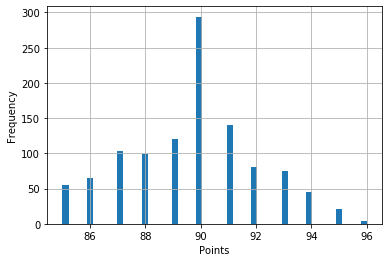

In [33]:
# what's the range of points look like?

points = df.points
points.plot.hist(grid=True, bins=50, rwidth=1)
plt.xlabel('Points')
plt.show()

In [34]:
# are there any countries that are awesome at wine?

mean_points_by_country = df.groupby('country')['points'].mean()
series = pd.Series(mean_points_by_country)
descending = series.sort_values(ascending=False)
print(descending)

country
New Zealand     94.000000
Austria         93.000000
Morocco         93.000000
Hungary         91.000000
Germany         90.518519
Canada          90.400000
Slovenia        90.000000
Moldova         90.000000
Spain           89.984375
US              89.916667
Italy           89.815951
Chile           89.761905
France          89.563953
Australia       89.500000
Greece          89.250000
Israel          89.000000
Portugal        88.985714
Bulgaria        88.600000
Croatia         88.000000
Romania         88.000000
Argentina       87.280000
South Africa    85.400000
Name: points, dtype: float64


In [5]:
# would you impute?  if so, why?

#it would depend on what i'm doing.  if i were going to use it to train an ML model, some can cope with it, while others
#wouldn't.  "region 2" has the most missing values, so if that were important to me i'd probably extrapolate from the 
#"region 1" and "winery" columns and could probably get pretty close.  

# perhaps i don't know enough about wine, but i don't think any of the missing data is all that important :)

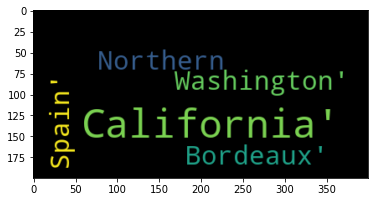

In [9]:
# word clouds for province and variety

text = str(df.province.values)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.show()



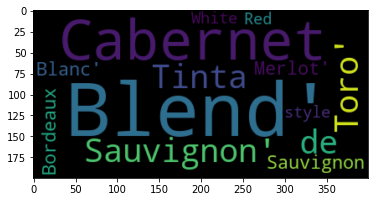

In [8]:
text = str(df.variety.values)
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.show()